In [1]:
'''
author: Felix Hol
date: 2020 
content: code to reproduce Figure 3 of Hol et al biteOscope manuscript
'''

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import scipy
import pickle
import glob
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [6]:
dataDir = '/Users/felix/Documents/mosquitoes/mosquitoData/biteData/albopictus/alboUpload/'
species = 'alb'
mosAge = 18
ccc = plt.cm.get_cmap('plasma', 6)

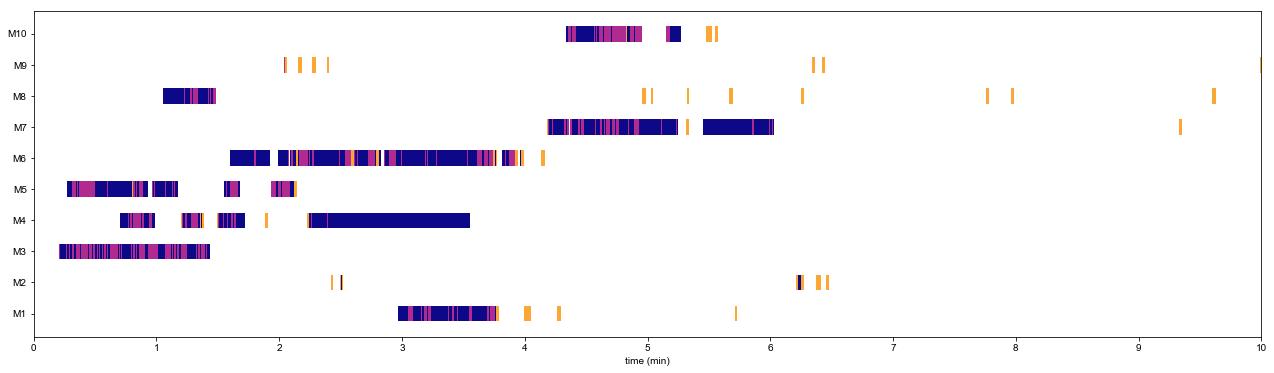

In [3]:
dirList = glob.glob('/Users/felix/Documents/mosquitoes/mosquitoData/biteData/albopictus/alboUpload/19*_NoATP_*/')

fig = plt.figure(figsize=(22,6))
ax = fig.add_subplot(1, 1, 1)
iM = 0

for D in dirList:
    pickleListStats = glob.glob(D + '/19*/*tStats.pkl')
    iM = iM + 0.2
    for i in pickleListStats:
        with open(i, "rb") as input_file:
            tStats = pickle.load(input_file)
            tStats.dropna(subset=['velocity'], inplace=True)
            tStats['smoothV'] = tStats.velocity.rolling(window=5).mean()
            tStats.dropna(subset=['smoothV'], inplace=True)
            p = tStats.frame
    #         iM = iM + 0.2
            ph = np.full((len(p)), iM)
            P = [p,ph]
            P_zipped = zip(*P)
            for P_x, P_y in P_zipped:
                if tStats.loc[tStats['frame'] == P_x].smoothV.values > 12:
                    ax.add_patch(plt.Rectangle((P_x, P_y), 30, 0.1, color=ccc(4), ec=None))
                elif tStats.loc[tStats['frame'] == P_x].smoothV.values > 2.0:
                    ax.add_patch(plt.Rectangle((P_x, P_y), 4, 0.1, color=ccc(2), ec=None))
                else:
                    ax.add_patch(plt.Rectangle((P_x, P_y), 4, 0.1, color=ccc(0), ec=None))

_=plt.xlim([0, 15000])
_=plt.ylim([0.1, 0.2 + iM])
_=plt.xlabel('time (min)')



_=plt.yticks(np.arange(0.25, iM +0.1, 0.2), ('M1', 'M2','M3','M4','M5','M6','M7','M8','M9', 'M10'))
_=plt.xticks(np.arange(0, 15001, 1500), np.arange(0,11,1))

# plt.savefig(saveDir + '/ethoAlbNoATP_th01.pdf')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


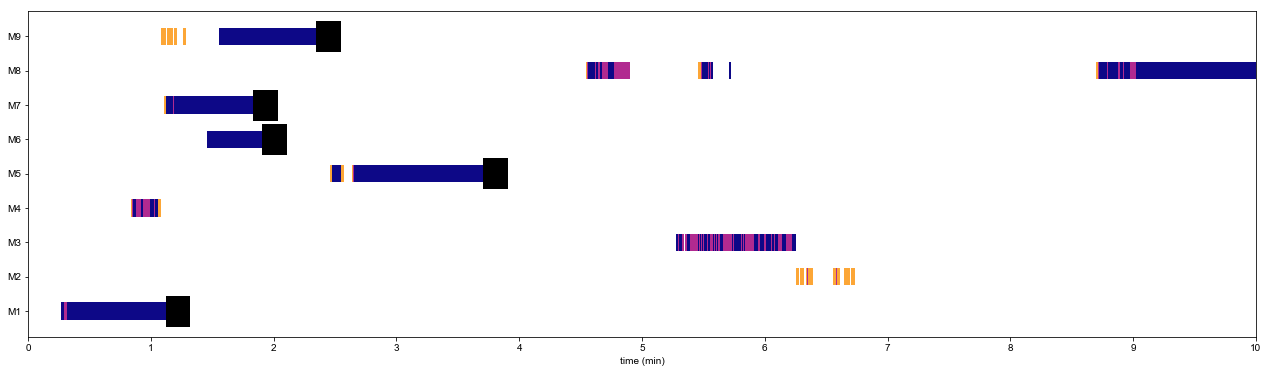

In [4]:
dirList = glob.glob('/Users/felix/Documents/mosquitoes/mosquitoData/biteData/albopictus/alboUpload/19*YesATP*/')

fig = plt.figure(figsize=(22,6))
ax = fig.add_subplot(1, 1, 1)
iM = 0

areaThreshold = 7000
engorgementIncrease = 1.22

for D in dirList:
    pickleListStats = glob.glob(D + '/19*/*tStats.pkl')
    iM = iM + 0.2
    for i in pickleListStats:
        with open(i, "rb") as input_file:
            tStats = pickle.load(input_file)
            tStats.dropna(subset=['velocity'], inplace=True)
            tStats['smoothV'] = tStats.velocity.rolling(window=5).mean()
            tStats.dropna(subset=['smoothV'], inplace=True)
            tStatsE = tStats.copy()
            tStatsE["engorged"] = 0
            belly = np.copy(tStatsE.bellyArea)
            if len(belly) > 100:
                belly[belly < 2000] = np.nan
                belly[belly > 8500] = np.nan
                if np.nanpercentile(belly[0:80], 80) > areaThreshold:
                    tStatsE["engorged"] = 2
                else:
                    if np.nanpercentile(belly[11:3000], 90) > 5500 and np.nanpercentile(belly[0:3000], 90) / np.nanpercentile(belly, 15) > engorgementIncrease:
                        tStatsE.loc[tStatsE['bellyArea'] > np.nanpercentile(belly, 90), 'engorged'] = 1
            tStatsT = tStatsE.copy()
            if np.max(tStatsE.engorged) > 0:
#                 print(D)
                tStatsT = tStatsE.truncate(after=tStatsE.engorged.idxmax())
            p = tStatsT.frame
    #         iM = iM + 0.2
            ph = np.full((len(p)), iM)
            P = [p,ph]
            P_zipped = zip(*P)
            for P_x, P_y in P_zipped:
                if tStats.loc[tStats['frame'] == P_x].smoothV.values > 12:
                    ax.add_patch(plt.Rectangle((P_x, P_y), 30, 0.1, color=ccc(4), ec=None))
                elif tStats.loc[tStats['frame'] == P_x].smoothV.values > 2.0:
                    ax.add_patch(plt.Rectangle((P_x, P_y), 4, 0.1, color=ccc(2), ec=None))
                else:
                    ax.add_patch(plt.Rectangle((P_x, P_y), 4, 0.1, color=ccc(0), ec=None))
            if np.max(tStatsE.engorged) > 0:
                ax.add_patch(plt.Rectangle((tStatsT.loc[tStatsE.engorged.idxmax()].frame, P_y - 0.04), 300, 0.18, color='k', ec=None))
                
            

_=plt.xlim([0, 15000])
_=plt.ylim([0.1, 0.2 + iM])
_=plt.yticks(np.arange(0.25, iM +0.1, 0.2), ('M1', 'M2','M3','M4','M5','M6','M7','M8','M9'))
_=plt.xlabel('time (min)')

_=plt.xticks(np.arange(0, 15001, 1500), np.arange(0,11,1))

# plt.savefig(saveDir + '/ethoAlbYesATP_th01.pdf')

In [7]:
pickleListStats = glob.glob(dataDir + '/19*No*/19*/*tStats.pkl')
mosDataExp = pd.DataFrame(columns=['p','mID', 'totDist','totTime','numLandings', 'meanSpeed', 'topSpeed', 'bellyWidthT', 'bellyAreaT'])
tTest = pd.DataFrame()


for i in pickleListStats:
    with open(i, "rb") as input_file:
        tTest = pickle.load(input_file)       
    mosDataExp = mosDataExp.append({'p': np.min(tTest.particle),
            'mID': i[99:120],
           'totDist': np.sum(tTest.distance),
            'totTime': np.max(tTest.frame) - np.min(tTest.frame),
             'numLandings': len(pickleListStats),                      
           'meanSpeed': np.nanmean(tTest.velocity),
           'topSpeed': np.nanpercentile(tTest.velocity,95),
            'bellyWidthT': tTest.bellyWidth.values, 
            'bellyAreaT': tTest.bellyArea.values},
            ignore_index=True)

    mosDataE = mosDataExp.copy()
    mosDataE["engorged"] = ''
    mosDataE["engorgementTime"] = ''
    mosDataE["species"] = species
    mosDataE["age"] = mosAge
    areaThreshold = 7000
    engorgementIncrease = 1.22

    for i in range(0, len(mosDataE)):
        belly = np.copy(mosDataE.iloc[i].bellyAreaT)
        if len(belly) < 50:
            mosDataE.at[i, 'engorged'] = 0
            mosDataE.at[i, 'engorgementTime'] = np.nan
        else:
            belly[belly < 2000] = np.nan
            belly[belly > 8500] = np.nan
            if np.nanpercentile(belly[0:80], 80) > areaThreshold:
                mosDataE.at[i, 'engorged'] = 2
                mosDataE.at[i, 'engorgementTime'] = np.nan
            else:
                if np.nanpercentile(belly[11:3000], 90) > 5500 and np.nanpercentile(belly[0:3000], 90) / np.nanpercentile(belly, 15) > engorgementIncrease:
                    mosDataE.at[i, 'engorged'] = 1
                    mosDataE.at[i, 'engorgementTime'] = np.where(belly[10:] > np.nanpercentile(belly, 90))[0][0]
                else:
                    mosDataE.at[i, 'engorged'] = 0
                    mosDataE.at[i, 'engorgementTime'] = np.nan
                    
mNoParticles = mosDataE.copy()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


In [8]:
pickleListStats = glob.glob(dataDir + '/19*Yes*/19*/*tStats.pkl')
mosDataExp = pd.DataFrame(columns=['p','mID', 'totDist','totTime','numLandings', 'meanSpeed', 'topSpeed', 'bellyWidthT', 'bellyAreaT'])
tTest = pd.DataFrame()


for i in pickleListStats:
    with open(i, "rb") as input_file:
        tTest = pickle.load(input_file)
    mosDataExp = mosDataExp.append({'p': np.min(tTest.particle),
            'mID': i[99:120],
           'totDist': np.sum(tTest.distance),
            'totTime': np.max(tTest.frame) - np.min(tTest.frame),
             'numLandings': len(pickleListStats),                      
           'meanSpeed': np.nanmean(tTest.velocity),
           'topSpeed': np.nanpercentile(tTest.velocity,95),
            'bellyWidthT': tTest.bellyWidth.values, 
            'bellyAreaT': tTest.bellyArea.values},
            ignore_index=True)

    mosDataE = mosDataExp.copy()
    mosDataE["engorged"] = ''
    mosDataE["engorgementTime"] = ''
    mosDataE["species"] = species
    mosDataE["age"] = mosAge
    areaThreshold = 7000
    engorgementIncrease = 1.22

    for i in range(0, len(mosDataE)):
        belly = np.copy(mosDataE.iloc[i].bellyAreaT)
        if len(belly) < 50:
            mosDataE.at[i, 'engorged'] = 0
            mosDataE.at[i, 'engorgementTime'] = np.nan
        else:
            belly[belly < 2000] = np.nan
            belly[belly > 8500] = np.nan
            if np.nanpercentile(belly[0:80], 80) > areaThreshold:
                mosDataE.at[i, 'engorged'] = 2
                mosDataE.at[i, 'engorgementTime'] = np.nan
            else:
                if np.nanpercentile(belly[11:3000], 90) > 5500 and np.nanpercentile(belly[0:3000], 90) / np.nanpercentile(belly, 15) > engorgementIncrease:
                    mosDataE.at[i, 'engorged'] = 1
                    mosDataE.at[i, 'engorgementTime'] = np.where(belly[10:] > np.nanpercentile(belly, 90))[0][0]
                else:
                    mosDataE.at[i, 'engorged'] = 0
                    mosDataE.at[i, 'engorgementTime'] = np.nan
                    
mYesParticles = mosDataE.copy()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [9]:
engorgedParticles = mYesParticles.loc[mYesParticles['engorged'] == 1]

In [10]:
allParticles = engorgedParticles.append(mNoParticles, ignore_index=True)

In [11]:
mP = allParticles.copy()
mP['logTotTime'] = np.log10(mP['totTime'].astype(float) / 25)

In [12]:
mosDirs_yes = glob.glob(dataDir + '/19*Yes*/')
mD_yes = pd.DataFrame()

for j in mosDirs_yes:
    pickleListStats = glob.glob(j + '/19*/*tStats.pkl')
    mosDataExp = pd.DataFrame(columns=['p','mID', 'totDist','totTime','numLandings', 'meanSpeed', 'topSpeed', 'bellyWidthT', 'bellyAreaT'])
    tTest = pd.DataFrame()


    for i in pickleListStats:
        with open(i, "rb") as input_file:
            currT = pickle.load(input_file)
            tTest = tTest.append(currT)


    mosDataExp = mosDataExp.append({'p': np.min(tTest.particle),
            'mID': i[99:120],
           'totDist': np.sum(tTest.distance),
            'totTime': len(tTest),
             'numLandings': len(pickleListStats),                      
           'meanSpeed': np.nanmean(tTest.velocity),
           'topSpeed': np.nanpercentile(tTest.velocity,95),
            'bellyWidthT': tTest.bellyWidth.values, 
            'bellyAreaT': tTest.bellyArea.values},
            ignore_index=True)

    mosDataE = mosDataExp.copy()
    mosDataE["engorged"] = ''
    mosDataE["engorgementTime"] = ''
    mosDataE["species"] = species
    mosDataE["age"] = mosAge
    areaThreshold = 7000
    engorgementIncrease = 1.22

    for i in range(0, len(mosDataE)):
        belly = np.copy(mosDataE.iloc[i].bellyAreaT)
        if len(belly) < 50:
            mosDataE.at[i, 'engorged'] = 0
            mosDataE.at[i, 'engorgementTime'] = np.nan
        else:
            belly[belly < 2000] = np.nan
            belly[belly > 8500] = np.nan
            if np.nanpercentile(belly[0:80], 80) > areaThreshold:
                mosDataE.at[i, 'engorged'] = 2
                mosDataE.at[i, 'engorgementTime'] = np.nan
            else:
                if np.nanpercentile(belly[11:3000], 90) > 5500 and np.nanpercentile(belly[0:3000], 90) / np.nanpercentile(belly, 15) > engorgementIncrease:
                    mosDataE.at[i, 'engorged'] = 1
                    mosDataE.at[i, 'engorgementTime'] = np.where(belly[10:] > np.nanpercentile(belly, 90))[0][0]
                else:
                    mosDataE.at[i, 'engorged'] = 0
                    mosDataE.at[i, 'engorgementTime'] = np.nan
    mD_yes = mD_yes.append(mosDataE, ignore_index=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in greater


In [13]:
mosDirs_no = glob.glob(dataDir + '/19*No*/')
mD_no = pd.DataFrame()

for j in mosDirs_no:
    pickleListStats = glob.glob(j + '/19*/*tStats.pkl')
    mosDataExp = pd.DataFrame(columns=['p','mID', 'totDist','totTime','numLandings', 'meanSpeed', 'topSpeed', 'bellyWidthT', 'bellyAreaT'])
    tTest = pd.DataFrame()


    for i in pickleListStats:
        with open(i, "rb") as input_file:
            currT = pickle.load(input_file)
            tTest = tTest.append(currT)


    mosDataExp = mosDataExp.append({'p': np.min(tTest.particle),
            'mID': i[99:120],
           'totDist': np.sum(tTest.distance),
            'totTime': len(tTest),
             'numLandings': len(pickleListStats),                      
           'meanSpeed': np.nanmean(tTest.velocity),
           'topSpeed': np.nanpercentile(tTest.velocity,95),
            'bellyWidthT': tTest.bellyWidth.values, 
            'bellyAreaT': tTest.bellyArea.values},
            ignore_index=True)

    mosDataE = mosDataExp.copy()
    mosDataE["engorged"] = ''
    mosDataE["engorgementTime"] = ''
    mosDataE["species"] = species
    mosDataE["age"] = mosAge
    areaThreshold = 7000
    engorgementIncrease = 1.22

    for i in range(0, len(mosDataE)):
        belly = np.copy(mosDataE.iloc[i].bellyAreaT)
        if len(belly) < 50:
            mosDataE.at[i, 'engorged'] = 0
            mosDataE.at[i, 'engorgementTime'] = np.nan
        else:
            belly[belly < 2000] = np.nan
            belly[belly > 8500] = np.nan
            if np.nanpercentile(belly[0:80], 80) > areaThreshold:
                mosDataE.at[i, 'engorged'] = 2
                mosDataE.at[i, 'engorgementTime'] = np.nan
            else:
                if np.nanpercentile(belly[11:3000], 90) > 5500 and np.nanpercentile(belly[0:3000], 90) / np.nanpercentile(belly, 15) > engorgementIncrease:
                    mosDataE.at[i, 'engorged'] = 1
                    mosDataE.at[i, 'engorgementTime'] = np.where(belly[10:] > np.nanpercentile(belly, 90))[0][0]
                else:
                    mosDataE.at[i, 'engorged'] = 0
                    mosDataE.at[i, 'engorgementTime'] = np.nan
    mD_no = mD_no.append(mosDataE, ignore_index=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [14]:
mYesATP = mD_yes.loc[mD_yes['engorged'] == 1].copy()
mBoth = mYesATP.append(mD_no, ignore_index=True)

In [15]:
mBothE = mBoth.copy()
mBothE.loc[mBothE['engorged'] == 0, 'timeE'] = mBothE.loc[mBothE['engorged'] == 0, 'totTime'] / 25
mBothE.loc[mBothE['engorged'] == 1, 'timeE'] = mBothE.loc[mBothE['engorged'] == 1, 'engorgementTime'] / 25

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


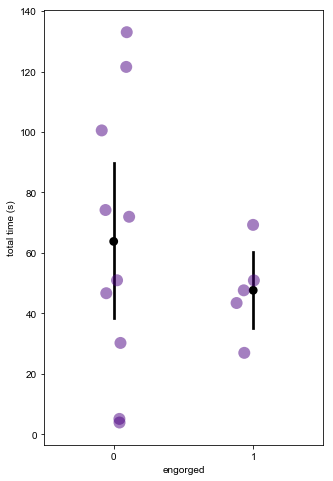

In [16]:
fig, ax = plt.subplots(figsize=(5,8))
ax = sns.pointplot(data=mBothE, x='engorged', y='timeE', color='k', join=False)
sns.stripplot(data=mBothE, x='engorged', y='timeE', jitter=0.13, size=12, alpha=0.5, color='indigo')# cmap=sns.color_palette("husl", 8))
_=ax.set_ylabel('total time (s)')

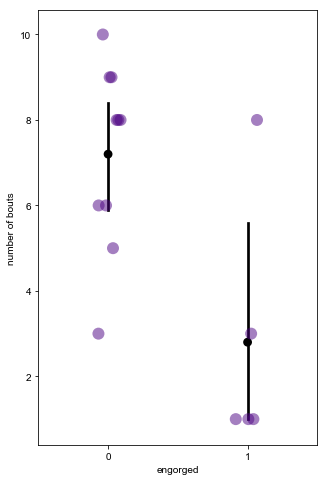

In [17]:
fig, ax = plt.subplots(figsize=(5,8))
ax = sns.pointplot(data=mBothE, x='engorged', y='numLandings', color='k', join=False)
sns.stripplot(data=mBothE, x='engorged', y='numLandings', size=12, alpha=0.5, color='indigo') #cmap=sns.color_palette("plasma", 8))
_=ax.set_ylabel('number of bouts')

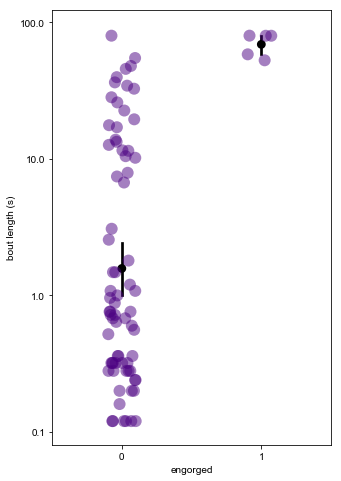

In [18]:
fig, ax = plt.subplots(figsize=(5,8))
ax = sns.pointplot(data=mP, x='engorged', y='logTotTime', color='k', join=False)
sns.stripplot(data=mP, x='engorged', y='logTotTime', size=12, alpha=0.5, color='indigo')
ax.set_ylabel('bout length (s)')
_=plt.yticks(np.arange(-1, 2.5, 1), np.logspace(-1, 2, 4))